# MSA 2024 Phase 2 - Part 2

In [15]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load and split preprocessed data

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/Users/elliotbu/Desktop/MSA 2024/W store sales/sales.csv')

# Convert from Date to Float
df['Date'] = pd.to_datetime(df['Date']).map(pd.Timestamp.toordinal)
df['Date'] = df['Date'].astype(float)

# Understand the dataset
print(df.head())
print('------------')
print(df.info())

# Define features (X) and target (y)
x = df.drop(columns=['Weekly_Sales'])
y = df['Weekly_Sales']

print('-------------')
# Split the data into training and test sets (70-30 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

print("Training data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)


   Store  Dept      Date  Weekly_Sales  IsHoliday
0      1     1  733808.0      24924.50      False
1      1     1  733815.0      46039.49       True
2      1     1  733822.0      41595.55      False
3      1     1  733829.0      19403.54      False
4      1     1  733836.0      21827.90      False
------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  float64
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(2), int64(2)
memory usage: 13.3 MB
None
-------------
Training data shape: (295099, 4) (295099,)
Test data shape: (126471, 4) (126471,)


## 2. Choose an algorithm

In [17]:
from sklearn.linear_model import LinearRegression

# Brief description of the chosen algorithm
# Linear Regression: Linear regression is a simple algorithm that models the 
# relationship between a dependent variable (target) and one or more independent variables (features) using a linear equation. 
# It aims to find the best-fitting straight line through the data points.

linear_model = LinearRegression()

## 3. Train and test a model

In [18]:
# Train the model and get prediction
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)

## 4. Evaluate the model 

R^2 Score: 0.02971512629386508
Mean Squared Error: 496827011.310484
Mean Absolute Error: 15129.189938575215
Symmetric mean absolute percentage error: 102.90817560074741
Mean absolute percentage error: 9697765847845576.0


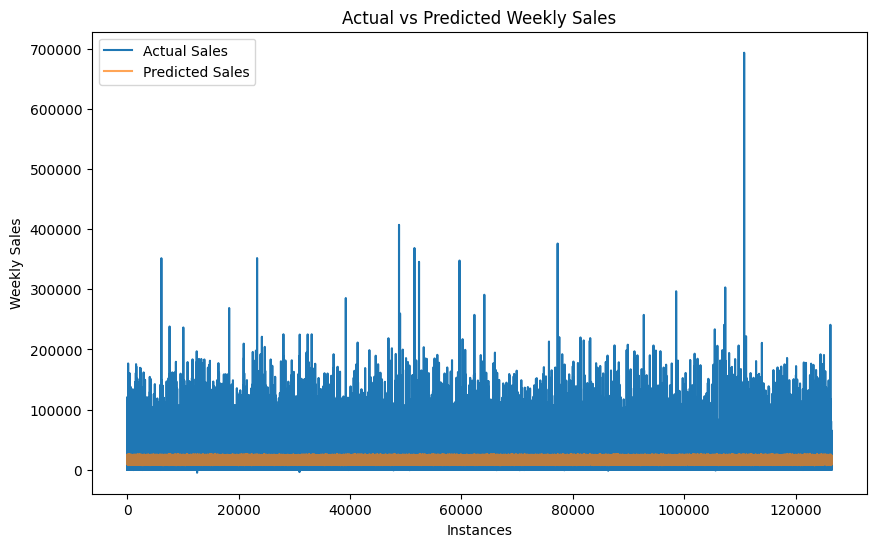

In [19]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Symmetric mean absolute percentage error 
def smape(y_test, y_pred):
    # Ensure inputs are numpy arrays
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    numerator = np.abs(y_test - y_pred)
    denominator = (np.abs(y_test) + np.abs(y_pred)) / 2
    smape_value = np.mean(numerator / denominator) * 100
    return smape_value

smape_value = smape(y_test, y_pred) 

print(f"R^2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Symmetric mean absolute percentage error: {smape_value}")
print(f"Mean absolute percentage error: {mape}")

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales', alpha=0.7)

plt.xlabel('Instances')
plt.ylabel('Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales')

plt.legend()
plt.show()


## 6. Bonus (Tuning Models)

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='r2')

# Train the model
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
tuned_model = LinearRegression(**best_params)
tuned_model.fit(x_train, y_train)
y_pred_tuned = tuned_model.predict(x_test)

# Results
r2_tuned = r2_score(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

def smape(y_test, y_pred):
    # Ensure inputs are numpy arrays
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    numerator = np.abs(y_test - y_pred)
    denominator = (np.abs(y_test) + np.abs(y_pred)) / 2
    smape_value = np.mean(numerator / denominator) * 100
    return smape_value

smape_value = smape(y_test, y_pred_tuned) 

print(f"Tuned R^2 Score: {r2_tuned}")
print(f"Tuned Mean Squared Error: {mse_tuned}")
print(f"Tuned Mean Absolute Error: {mae_tuned}")
print(f"Mean absolute percentage error: {mean_absolute_percentage_error(y_test, y_pred_tuned)}")
print(f"Symmetric mean absolute percentage error:{smape_value}")


Best Parameters: {'fit_intercept': False, 'positive': False}
Tuned R^2 Score: 0.029718571687659456
Tuned Mean Squared Error: 496825247.12272006
Tuned Mean Absolute Error: 15129.1411954464
Mean absolute percentage error: 9696312394199258.0
Symmetric mean absolute percentage error:102.90772247038535


## Other Algorithms

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

tree_model = DecisionTreeRegressor(random_state=101)
forest_model = RandomForestRegressor(random_state=101)
boosting_model = GradientBoostingRegressor(random_state=101)

# Train and evaluate Decision Tree
tree_model.fit(x_train, y_train)
y_pred_tree = tree_model.predict(x_test)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree R^2 Score: {r2_tree}")

# Train and evaluate Random Forest
forest_model.fit(x_train, y_train)
y_pred_forest = forest_model.predict(x_test)
r2_forest = r2_score(y_test, y_pred_forest)
print(f"Random Forest R^2 Score: {r2_forest}")

# Train and evaluate Gradient Boosting
boosting_model.fit(x_train, y_train)
y_pred_boosting = boosting_model.predict(x_test)
r2_boosting = r2_score(y_test, y_pred_boosting)
print(f"Gradient Boosting R^2 Score: {r2_boosting}")


Decision Tree R^2 Score: 0.9134384779873418
Random Forest R^2 Score: 0.9506392358671507
Gradient Boosting R^2 Score: 0.6315756597060991


## 5. Summary

Exploratory Data Analysis (EDA):

This notebook delves deeper into the dataset by conducting further exploratory data analysis. It involves examining relationships between different variables and the target variable, weekly sales. This step includes visualizing the data through plots and graphs to uncover patterns and correlations. The dataset is explored for missing values and potential outliers, providing insights into data quality and areas that need cleaning or imputation.

Preprocessing Steps:

Preprocessing in this phase involves feature engineering and data transformation. New features are created to enhance model performance, such as encoding categorical variables, handling missing values, and scaling numerical features. The data is prepared for modeling by splitting it into features (X) and target (y). Various preprocessing techniques like one-hot encoding for categorical variables, scaling for numerical variables, and handling missing data through imputation or removal are applied. The dataset is again split into training and testing sets to ensure that the models are trained and validated appropriately.

Bonus: Model Tuning and Other Algorithms:

Model tuning was performed using GridSearchCV to find the best hyperparameters for the Linear Regression model. Other algorithms, including Decision Tree, Random Forest, and Gradient Boosting, were also evaluated for comparison. The tuning process involved setting a parameter grid and using cross-validation to find the optimal parameters, resulting in improved model performance. The other algorithms were trained and evaluated, providing a comprehensive view of different modeling approaches and their respective performance metrics.